# python基础

[numpy](#numpy)<br>
[pandas](#pandas)<br>
[sklearn](#sklearn)

## numpy

科学计算

- numpy 的数据存储和 python 原生 list 不一样，大多数代码都是通过 C 语言实现
- numpy 直接以向量和矩阵为粒度进行计算，并且支持大量的数学函数
- numpy 是很多数据科学类库的基础

In [1]:
import numpy as np

In [2]:
def python_sum(n):
    return sum([i**2 + i**3 for i in range(n)])

In [3]:
def numpy_sum(n):
    return np.sum(np.arange(n)**2 + np.arange(n)**3)

In [4]:
python_sum(10)

2310

In [5]:
numpy_sum(10)

2310

In [6]:
%timeit python_sum(1000)

895 µs ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%timeit numpy_sum(1000)

15.8 µs ± 505 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%timeit python_sum(100000)

91.9 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit numpy_sum(100000)

1.41 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**array**

数组是 numpy 的核心数据结构

In [10]:
np.array([1, 2])

array([1, 2])

In [11]:
np.array([1, 2], ndmin=2)

array([[1, 2]])

In [12]:
a = np.array([[1, 2], [2, 4], [3, 6]])
a

array([[1, 2],
       [2, 4],
       [3, 6]])

In [13]:
a.shape

(3, 2)

In [14]:
a.ndim

2

In [15]:
a.size

6

In [16]:
a.dtype

dtype('int32')

In [17]:
np.arange(1, 20, 2).reshape(2, 5)

array([[ 1,  3,  5,  7,  9],
       [11, 13, 15, 17, 19]])

In [18]:
np.ones(1)

array([1.])

In [19]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [20]:
np.random.randn(1, 2)

array([[ 1.65414044, -1.13209706]])

In [21]:
a

array([[1, 2],
       [2, 4],
       [3, 6]])

In [22]:
a + 1

array([[2, 3],
       [3, 5],
       [4, 7]])

In [23]:
a + a

array([[ 2,  4],
       [ 4,  8],
       [ 6, 12]])

In [24]:
a * 3

array([[ 3,  6],
       [ 6, 12],
       [ 9, 18]])

In [25]:
np.exp(a)

array([[  2.71828183,   7.3890561 ],
       [  7.3890561 ,  54.59815003],
       [ 20.08553692, 403.42879349]])

In [4]:
np.exp([1,2])

array([2.71828183, 7.3890561 ])

In [26]:
a[0][0]

1

In [27]:
a[0, 0]

1

In [28]:
a[1]

array([2, 4])

In [29]:
a[:-1]

array([[1, 2],
       [2, 4]])

In [30]:
a[:, 1]

array([2, 4, 6])

In [31]:
# 神奇索引

a[[0, -1], 1]

array([2, 6])

In [32]:
a[[0, 1], :]

array([[1, 2],
       [2, 4]])

In [33]:
a[[0, -1], [0, 1]]

array([1, 6])

In [34]:
a[a<3]

array([1, 2, 2])

In [35]:
a[(a<3) | (a==6)]

array([1, 2, 2, 6])

**axis**

计算轴，axis = 0：
- 0代表行，对行计算
- 跨行计算，消灭行
- 针对不同的样本计算

In [36]:
a.sum(axis=0)

array([ 6, 12])

In [37]:
a.sum(axis=1)

array([3, 6, 9])

## pandas

数据分析

- 高性能
- 容易使用的数据类型
- 强大的数据分析

In [38]:
import pandas as pd

**series**

类似于一维数组对象，由一组数据和与之相关联的索引组成

In [39]:
pd.Series([1, 2.0, "s"])

0    1
1    2
2    s
dtype: object

In [40]:
pd.Series([1, 2.0, "s"], index=["a", "b", "c"])

a    1
b    2
c    s
dtype: object

In [41]:
a = pd.Series({"a": 1, "b": 2.0, "c": "s"})
a

a    1
b    2
c    s
dtype: object

In [42]:
a.index

Index(['a', 'b', 'c'], dtype='object')

In [43]:
a.values

array([1, 2.0, 's'], dtype=object)

In [44]:
a["a"]

1

In [45]:
a[["a", "b"]]

a    1
b    2
dtype: object

**dataframe**

表格型数据结构，不仅有行索引 index，也有列索引 columns

In [46]:
pd.DataFrame({"a": [1, 2], "b": [11, 22]})

,a,b
0,1,11
1,2,22


In [47]:
a = pd.DataFrame([[1, 11], [2, 22]], columns=["a", "b"])
a

,a,b
0,1,11
1,2,22


In [48]:
a.index

RangeIndex(start=0, stop=2, step=1)

In [49]:
a.columns

Index(['a', 'b'], dtype='object')

In [50]:
a.values

array([[ 1, 11],
       [ 2, 22]], dtype=int64)

In [51]:
a.a

0    1
1    2
Name: a, dtype: int64

In [52]:
a["a"]

0    1
1    2
Name: a, dtype: int64

In [53]:
a[["a", "b"]]

,a,b
0,1,11
1,2,22


In [54]:
a.loc[0]

a     1
b    11
Name: 0, dtype: int64

In [55]:
a.loc[0:1]

,a,b
0,1,11
1,2,22


In [56]:
a.iloc[0, 1]

11

In [57]:
a.loc[0, "b"]

11

## sklearn

官网：https://scikit-learn.org/stable/

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
x_train = [[0], [1], [2]]
y_train = [0, 1, 2]

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
reg.coef_

array([1.])

In [5]:
reg.intercept_

3.3306690738754696e-16

**dataset**

玩具数据集

In [6]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()           # classification          鸢尾花
wine = datasets.load_wine()           # classification          红酒
boston = datasets.load_boston()       # regression              波士顿房价

In [8]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**训练**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
wine_x = wine.data
wine_y = wine.target
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3)

In [14]:
len(x_train)

124

In [15]:
124/178

0.6966292134831461

In [16]:
from sklearn import tree
import graphviz

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9444444444444444

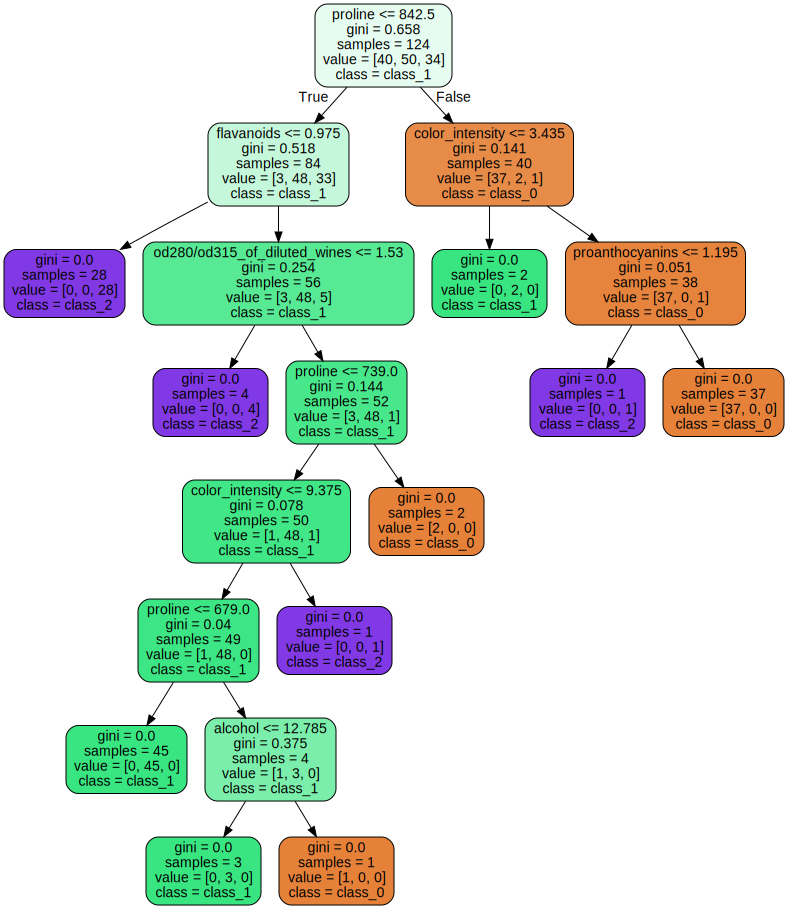

In [18]:
doc_data = tree.export_graphviz(clf, 
                                feature_names=wine.feature_names, 
                                class_names=wine.target_names,
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(doc_data)
graph

**保存**

在Python中，如果希望透明地存储对象，而不丢失其身份和类型等信息，则需要某种形式的对象序列化，这是一个将任意复杂的对象转成对象的文本和二进制表示的过程。同样，必须能够将对象经过序列化后的形式恢复到原来的对象。这种序列化的过程称为pickle，可以将对象pickle成字符串、磁盘上的文件或者任何类似于文件的对象；反序列化的过程就是将这些字符串、文件或任何类似于文件的对象unpickle成原来的对象。

joblib库是由scikit-learn外带的对于大数据而言，joblib比pickle更加高效，但是joblib只能将对象存储在磁盘文件中，不能保存为字符串。

In [19]:
import pickle

In [20]:
s = pickle.dumps(clf)  # 保存模型成字符串

In [21]:
clf_ = pickle.loads(s)

In [22]:
import joblib

In [23]:
joblib.dump(clf, "./wine_clf.pkl")  # 保存模型到文件（非字符串）

['./wine_clf.pkl']

In [24]:
wine_clf = joblib.load("./wine_clf.pkl")

In [25]:
wine_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')